In [2]:
#Import packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                #for plotting results
from sklearn.preprocessing import Normalizer   #for pre-processing
from sklearn.preprocessing import Binarizer    #for post-hoc analysis, to get top words in cluster by fraction of articles they appear in
from sklearn.cluster import KMeans             #the package we will use for k means clustering
from sklearn.metrics import silhouette_score   #calculates overall silhouette score of a clustering
from sklearn.metrics import silhouette_samples #calculates silhouette score for each observation
import matplotlib.cm as cm                     #for nice colors for silhouette plots

C:\Users\arism\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\arism\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [3]:
#Read data
data = pd.read_csv('DailyKos.csv')
data.head()   #show first five rows of dataframe

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [4]:
#Normalize observations with l1 norm
#converts features into relative frequency of words in article rather than raw count
normalizer = Normalizer(norm='l1')
scaled = pd.DataFrame(normalizer.fit_transform(data), columns=data.columns)
scaled.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.009009
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.00641,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.015873,0.0,0.0,0.007937,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.006623,0.006623,0.0,0.0,0.006623,0.0,0.0,0.0,0.000000


In [5]:
#look at words with highest relative frequencies in data
topwords = scaled.mean().sort_values(ascending=False)[:15]
print(topwords)

bush          0.022390
kerry         0.016068
poll          0.013824
democrat      0.012383
republican    0.008657
elect         0.008145
general       0.007893
state         0.007529
vote          0.006696
senate        0.006440
house         0.006352
war           0.006234
time          0.006192
campaign      0.005999
dean          0.005961
dtype: float64


In [9]:
#Make an elbow plot for 1 through 8 clusters,
#and plot overall silhouette scores for 2 through 8 clusters
clusterSizes = list(range(1,9))
avgDistances = []
silhouettes = []
mdlKMeans = KMeans(n_init = 25, # number of different centroid seed initializations (number of times algorithm is run)
random_state = 10)
for k in clusterSizes:
    # make and fit a model with k clusters
    # -------------------
    mdlKMeans.n_clusters = k
    mdlKMeans.fit(scaled)
    #record sum of squared distances (a.k.a. inertia) for each clustering
    avgDistances.append(mdlKMeans.inertia_)
    if k>1:
        #record overall silhouette score for each clustering (doesn't work for 1 cluster)
        silhouettes.append(silhouette_score(scaled, mdlKMeans.labels_))
    # -------------------

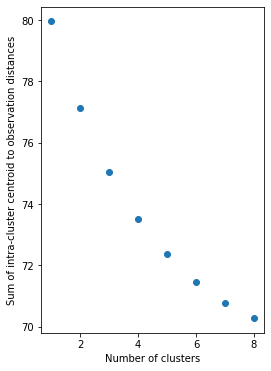

In [10]:
#Elbow plot

fig = plt.figure(figsize=(4,6))
plt.scatter(clusterSizes,avgDistances)
plt.ylabel('Sum of intra-cluster centroid to observation distances')
plt.xlabel('Number of clusters')
plt.show()

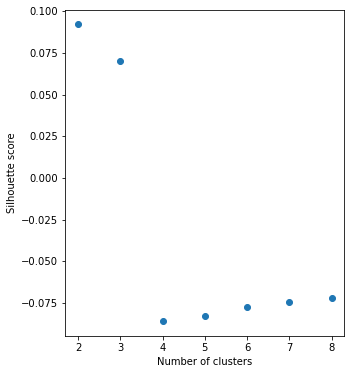

In [29]:
#Silhouette scores

fig = plt.figure(figsize=(5,6))
plt.scatter(clusterSizes[1:],silhouettes)
plt.ylabel('Silhouette score')
plt.xlabel('Number of clusters')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.0920157815040047
For n_clusters = 3 The average silhouette_score is : 0.07017985864929455
For n_clusters = 4 The average silhouette_score is : -0.08583214676130207


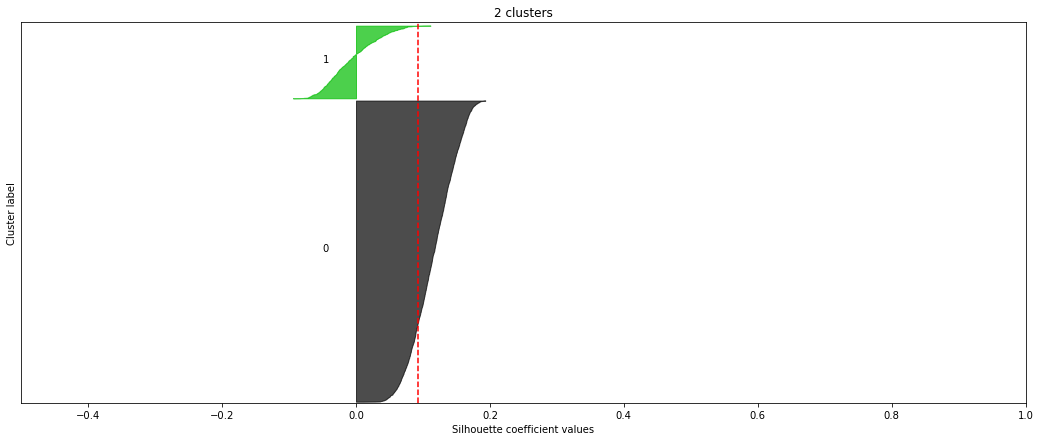

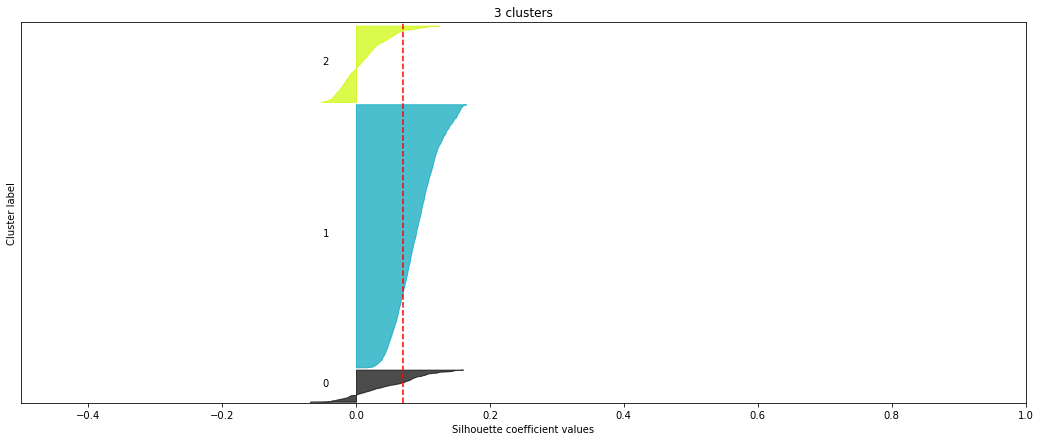

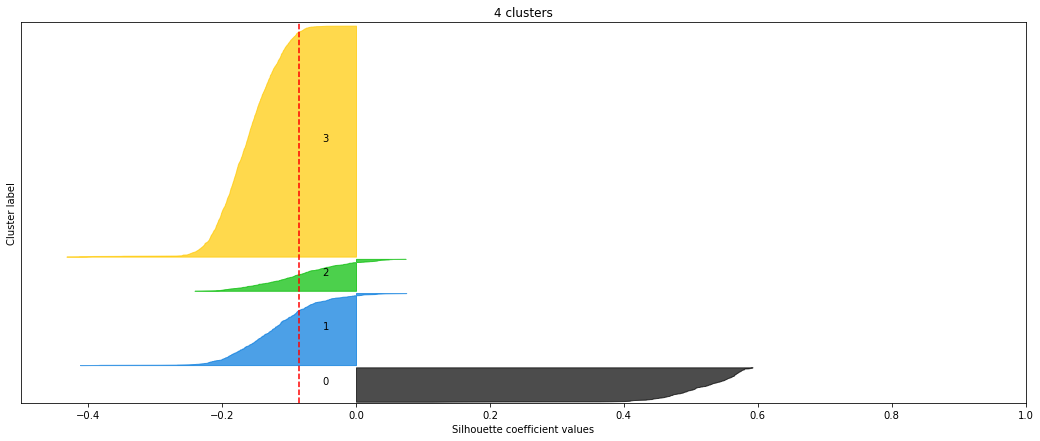

In [54]:
#Create full silhouette plots for 2, 3, and 4 clusters

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    fig = plt.figure()
    fig.set_size_inches(18, 7)
    plt.xlim([-0.5, 1])
    
    # The (n_clusters+1)*50 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(data) + (n_clusters + 1) * 20])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init = 15, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 20

    plt.title("%d clusters" % n_clusters)
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])


In [18]:
#despite 2 clusters having a better score, the full plots
#suggest that 3 clusters yields better clusters for the smaller clusters
#with insignificant change for the big cluster

mdlKMeans = KMeans(n_init = 25, # number of different centroid seed initializations (number of times algorithm is run)
n_clusters=3, # number of clusters (k)
random_state = 10) # random seed for kmean algorithm
mdlKMeans.fit(scaled)
# Get cluster assignments for each datapoint
clK = mdlKMeans.labels_
# Get the centroid of each cluster
Centroids = mdlKMeans.cluster_centers_

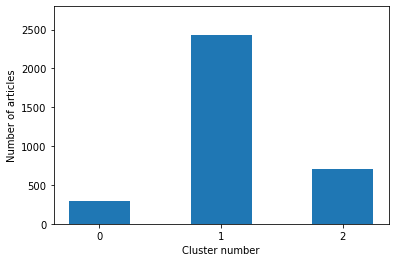

In [19]:
# Make a histogram of number of points in each cluster (labeled 0 -> 2)
binNums = list(set(clK))
# Add on range to cover last value
binNums.append(np.max(binNums)+1)
#Plot histogram
fig = plt.figure()
plt.hist(clK,bins=binNums,rwidth=0.5,align='left')
plt.ylabel('Number of articles')
plt.ylim((0,2800))
plt.xlabel('Cluster number')
plt.xticks(range(0,3))
plt.show()
#fig.savefig('Kmeans_ClusNum.pdf',bbox_inches='tight')

In [21]:
#Get top 10 words in each cluster by mean relative freuency
final_all = []
for i in range(3):
    out = scaled.iloc[clK==i]
    counts = out.mean()
    counts = counts.sort_values(ascending=False)
    final = counts.iloc[0:10]
    print("cluster %d\n"%i, final, "\n")

cluster 0
 dean         0.049536
poll         0.042395
kerry        0.042108
edward       0.029633
primaries    0.028711
clark        0.027232
democrat     0.026924
lieberman    0.015307
gephardt     0.015182
result       0.011227
dtype: float64 

cluster 1
 democrat      0.012004
bush          0.011225
republican    0.010322
elect         0.009296
poll          0.009140
senate        0.007929
house         0.007766
november      0.007584
state         0.007276
vote          0.007257
dtype: float64 

cluster 2
 bush              0.067433
kerry             0.038338
poll              0.017919
general           0.013632
presided          0.012335
administration    0.008843
democrat          0.007560
iraq              0.007437
campaign          0.007400
state             0.007386
dtype: float64 



In [27]:
#Get top 10 words in each cluster by mean total count
final_all = []
for i in range(3):
    out = data.iloc[clK==i]
    counts = out.mean()
    counts = counts.sort_values(ascending=False)
    final = counts.iloc[0:10]
    print("cluster %d\n"%i, final, "\n")

cluster 0
 dean         4.158249
kerry        3.326599
poll         2.548822
edward       2.114478
clark        2.010101
primaries    1.791246
democrat     1.754209
gephardt     1.117845
lieberman    1.067340
iowa         0.936027
dtype: float64 

cluster 1
 democrat      1.567545
bush          1.511532
november      1.495881
republican    1.279242
poll          1.227348
vote          1.095552
elect         0.983526
state         0.947282
senate        0.923394
house         0.912273
dtype: float64 

cluster 2
 bush        5.834043
kerry       3.323404
poll        1.533333
presided    1.150355
general     0.914894
democrat    0.746099
campaign    0.741844
state       0.706383
iraq        0.702128
time        0.660993
dtype: float64 



In [25]:
#Get top 10 words in each cluster by fractions of articles including it
binarizer = Binarizer()
binarydata = pd.DataFrame(binarizer.fit_transform(data), columns=data.columns)
final_all = []
for i in range(3):
    out = binarydata.iloc[clK==i]
    counts = out.sum()
    counts = counts.sort_values(ascending=False)
    final = counts.iloc[0:10]
    print("cluster %d\n"%i, final, "\n")

cluster 0
 democrat     275
primaries    269
dean         266
kerry        262
edward       240
poll         235
clark        215
lieberman    167
gephardt     158
state        134
dtype: int64 

cluster 1
 bush          1451
democrat      1334
elect         1277
republican    1197
general       1177
house         1055
war           1047
time          1013
poll           995
senate         972
dtype: int64 

cluster 2
 bush              697
kerry             517
general           482
presided          363
poll              333
time              282
democrat          278
elect             252
administration    250
state             246
dtype: int64 

